# Project 1: Wine Data Set
> (2/18/2020) Serena Patel

The primary question we are looking to answer is: can you classify a wine as type one, two, or three by looking at its chemical properties, such as alcohol or magnesium? Can we predict the type of wine (one, two, or three) based on a classification model?

Here is an overview of of our data: 
*  13 features (dependent variables / dimension of data)
*  1 discrete prediction ( independent variable - 1/2/3) dim(y)= 1
*  178 number of instances (number of observations)
*  task: classification

(source: class powerpoint)

In [0]:
# Loading useful packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn

from itertools import count

In [0]:
# Read in the wine data for each type
# Data sourced from https://archive.ics.uci.edu/ml/datasets/wine/wine.data/
wines = pd.read_csv("wine.data", sep=",")

# name the columns
wines.columns = [  'type'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashAlcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]


# Exploration of Data.

> It is important to understand the quantitative analysis of our data. 



In [0]:
wines.describe()


,type,alcohol,malicAcid,ash,ashAlcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Visualization

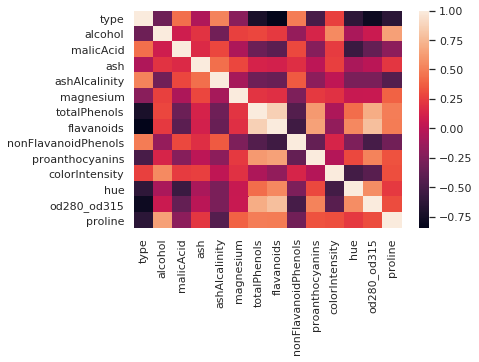

In [15]:
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


Since we have a mix of 13 variables, I created a correlation matrix that shows us the interactivity between the variables. This shows how related, or unrelated some variables. For example, {type & proline}, {OD280/OD315 & type}, {hue & type}, {flavanoids & type}, and {total phenols & type} are the most unrelated. Meanwhile, on the opposite side of the spectrum, {flavanoids & total phenols}, {total phenols & OD280/OD315}, and {OD280/OD315 & flavanoids} seem to be closly related. From this, we can say that the variables of interest for classification are proline, OD280/OD315, hue, flavanoids, and total phenols. 

We want to explore these 5 attributes a bit, in terms of our raw data.

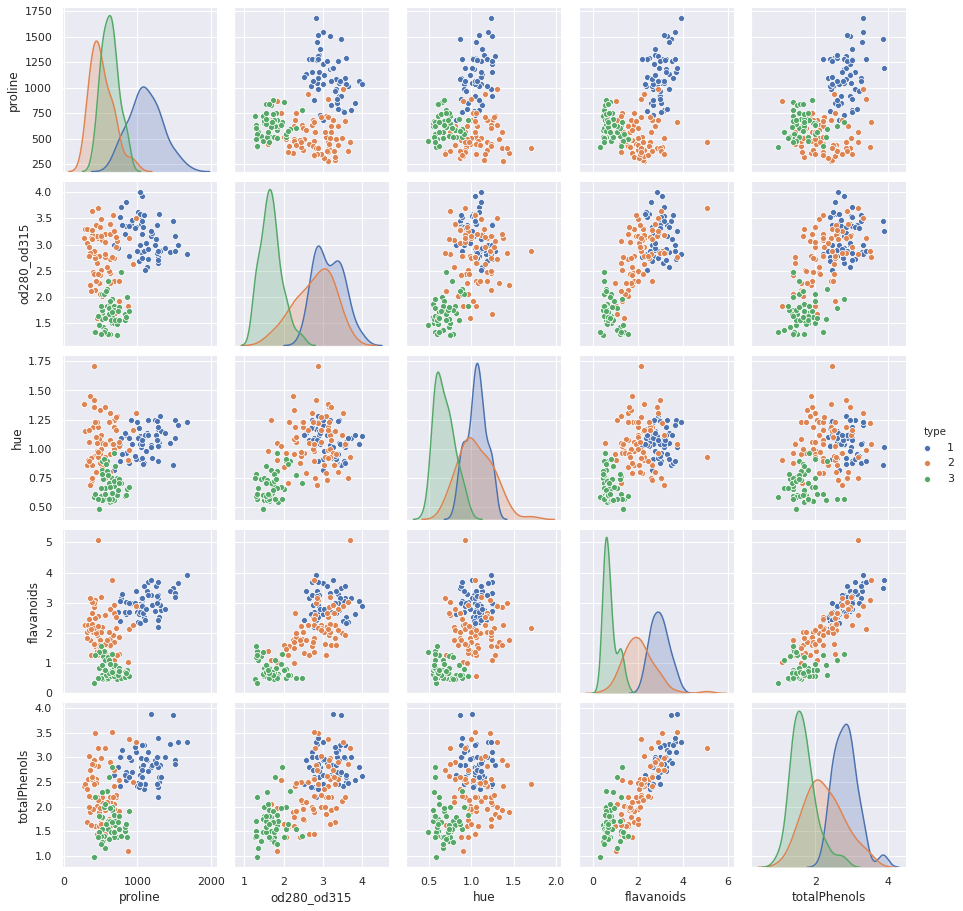

In [16]:
#create a sub-group
subGroup = wines[['type','proline', 'od280_od315', 'hue', 'flavanoids',  'totalPhenols']]

sns.pairplot(subGroup, hue = 'type')

# Linear Regression Model



> Source: our textbook

> [Simple & Multiple Linear Regression](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)



In [17]:
# Encode wine class 1 as itself and all others as 0
subGroup.loc[subGroup['type'] != 1, 'type'] = 0

print(subGroup.groupby('type').size())



type
0    119
1     59
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
def linreg(inputs, targets):
  inputs = np.concatenate((inputs,-np.ones((np.shape(inputs)[0],1))), axis = 1)
  beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(inputs), inputs)), np.transpose(inputs)), targets)
  outputs = np.dot(inputs,beta)

  beta = linreg.linreg(X_train,train_target)

  testin = np.concatenate((X_test, -np.ones((np.shape(X_test)[0],1))), axis = 1)
  testout = np.dot(X_test, beta)
  error = np.sum((y_test - test_target))

# Train & Test Data


> The sub-group of attributes narrows down the number of attributes we look at at allows us to utilize it within the training and testing of our data. In paticular, we can select the flavanoids and OD280/OD315 attributes to examine as part of our model selection because they have the most linear distribution that matches with our type prediction. The next step is to split our data into the training and testing data. I utilized the selection process from sklearn to split the data into training and testing into a 60-40 split of the data.



In [18]:
from sklearn import model_selection

X = np.array(subGroup[['od280_od315','flavanoids']])
y = np.array(subGroup['type'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape)
print(X_test.shape)

(106, 2)
(72, 2)


#Preprocessing Our Data

> Preprocessing our data allows us to be working the optimal version of our data. Specifically, the linear regression model allows our data to 'fit' together better. In an examination  of linear regression, we utilize a c value of 10, which is associated with our Support Vector Model in terms of alpha, and a penalty of l2. The penalty of l2 refers to the ridge regression model, and this is utilized because we have already shrunk the number of attributes. 

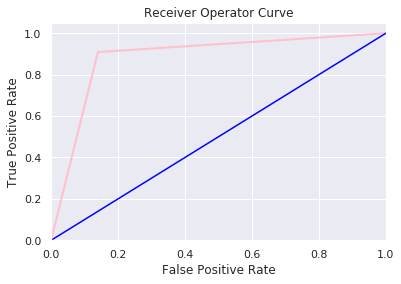

AUC : 0.8845454545454545


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve

#Logistical regession model; C=10 with l2 penalty
lr = LogisticRegression(C=10, penalty='l2')
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,ypred, drop_intermediate=False)
auc = auc(fpr,tpr)

# Plot ROC Curve
plt.plot(fpr,tpr, color='pink', lw=2)
plt.plot([0,1],[0,1], color='blue')
plt.xlabel('False Positive Rate')
plt.xlim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.ylim([0.0,1.05])
plt.title('Receiver Operator Curve')
plt.show()
print('AUC :' , auc)

Our graph shows the plot for the true and false positivity rates as an examination of our data accuracy. We find that there is an 88% chance that the model will be able to distinguish between the positive and negative cases. The pink line above shows us the way our model distinguishes. Since the blue line is the worst case scenario, and our pink line was above that, we can conclude that the model is working well.  

#K-Fold Cross Validation


> K-fold cross validation is utilized to measure the chance the change of the model over different subsets of our data. I utilized a support vector machine, from my reseach, to help train the data in order to categorize it within our cross validation of our data. The cross validation utilizes k number number of groups to split the data into. Essentially, we utilize the cross validataion to train our data so that it can improve the accuracy of our MLP model and prediction.



In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

#utilize a support vector machine
svm = SVC(C=1000)
svm.fit(X_train, y_train)
yPredsvm = svm.predict(X_test)

# Cross validate our data
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(svm, X, y, cv=kfold)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [12]:
from sklearn.metrics import accuracy_score, precision_score

# Use several evaluation metrics for the model
print('Accuracy: ' , accuracy_score(y_test,ypred))
print('Precision: ' , precision_score(y_test, ypred))

NameError: ignored

From this, we see that our support vector model has trained our data and implemented into a k-fold cross validataion that examines teh accuracy and precision oof our data 

#Entropy Decision Tree

> We want to find a predicate value (to be used in the MLP computation), we can use an entropy decision tree to find it.



In [0]:
from sklearn.tree import DecisionTreeClassifier
# Using a Decision Tree
# With Entropy as the impurity measure
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
tree.fit(X_train, y_train)
yPredTree = tree.predict(X_test)

The predicate value found within the entropy decision tree is utilized to determine the homogeniality of the data to determine if its been training well enough. The wellness of training is crucial to the weights and the hidden layer of the MLP.

# Multi-Layer Perceptron

A multi-layer perceptron is a type of Artifical Neural Network that utilizes three layers of nodes, an activation function, and backpropogation for training to compute some error. The general algorithm for an MLP model is as follows: 

1. an input vector is put into the input nodes

2. the inputs are fed forward through the network
> * the inputs and the first-layer weights *v* are used to decide whether the hidden nodes fire or not. The activation function g(.) is the sigmoid function ...
> * the outputs of these neurons and the second-layer weights *w* are used to decide if the output neurons fire or not. 

3. the *error* is computed as the sum-of-squares difference between the network outputs and the targets

4. this error is fed *backwards* through the network in order to...
> * first update the second-layer weights
> * and then afterwards, the first-layer weights

Source: our textbook

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

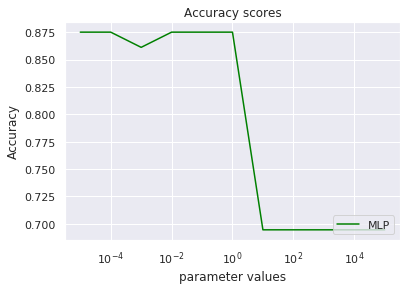

Accuracy: 0.87500


In [35]:
from sklearn.neural_network import MLPClassifier

params, scores = [],[]
for x in range(-5,6):
    mlp = MLPClassifier(solver='lbfgs'
                    , activation = 'relu'
                    , alpha=10**x
                    , hidden_layer_sizes=(45,45,45,45)  # a  fraction of our input data (178/4)
                    , random_state=1)
    mlp.fit(X_train, y_train)
    yPredMLP = mlp.predict(X_test)
    score = accuracy_score(y_test,yPredMLP)
    params.append(mlp.alpha)
    scores.append(score)
        
plt.plot(params,scores,color='green', label='MLP')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel('Accuracy')
plt.title('Accuracy scores')
plt.show()


print("Accuracy: %0.5f" % max(scores))

We have reached an 88% accruacy with our MLP model. We could train more data and process it more through our cross-validation sequence to increase our accuracy. Every time we increase the number of times we cross validate our data, we end up with a higher accuracy. 

# Python MLP 


> The below code is some of the MLP algorithm written in python, without the utilization of sklearn. This is a basic instantiation of the MLP algorithm. 



In [0]:
class MLP:

    #our weights and biases
    def __init__(self, n_in, n_hid, n_out): 
        self.W1 = np.random.randn(n_in, n_hid) * 0.01
        self.b1 = np.zeros(shape=(1, n_hid))
        self.W2 = np.random.randn(n_hid, n_out) * 0.01
        self.b2 = np.zeros(shape=(1, n_out))        
        # For momentum
        self.VdW1 = np.zeros(shape=(n_in, n_hid)) 
        self.Vdb1 = np.zeros(shape=(1, n_hid))
        self.VdW2 = np.zeros(shape=(n_hid, n_out))
        self.Vdb2 = np.zeros(shape=(1, n_out))
        return

    #forward propogation neuron values
    def forward_prop(self, X):
     
        self.A0 = X

        self.Z1 = np.dot(self.A0, self.W1) + self.b1
        self.A1 = relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2 
        self.A2 = sigmoid(self.Z2)

        hat_y = self.A2
        
        return hat_y

    #backward prop neuron values, utilizing partial derivatives
    def backward_prop(self, X, y):
        
        m = y.shape[0]

        self.dZ2 = self.A2 - y
        self.dW2 = 1/m * np.dot(self.A1.T, self.dZ2)
        self.db2 = 1/m * np.sum(self.dZ2, axis = 0, keepdims = True)
        self.dA1 = np.dot(self.dZ2, self.W2.T)

        self.dZ1 = self.dA1*dRelu(self.Z1)
        self.dW1 = 1/m * np.dot(self.A0.T, self.dZ1)
        self.db1 = 1/m * np.sum(self.dZ1, axis = 0, keepdims = True)

        return

    
    def gradient_descent(self, alpha):

        self.W1 = self.W1 - alpha*self.dW1
        self.b1 = self.b1 - alpha*self.db1
        self.W2 = self.W2 - alpha*self.dW2
        self.b2 = self.b2 - alpha*self.db2
            
        return

    
    def momentum(self, alpha, beta):

        self.VdW1 = beta*self.VdW1 + (1 - beta)*self.dW1
        self.W1 = self.W1 - alpha*self.VdW1

        self.Vdb1 = beta*self.Vdb1 + (1 - beta)*self.db1
        self.b1 = self.b1 - alpha*self.Vdb1

        self.VdW2 = beta*self.VdW2 + (1 - beta)*self.dW2
        self.W2 = self.W2 - alpha*self.VdW2

        self.Vdb2 = beta*self.Vdb2 + (1 - beta)*self.db2
        self.b2 = self.b2- alpha*self.Vdb2
                
        return

In [0]:
# MLP instantiation 
MLP = MultiLayerPerceptron(n_in, n_hidden, n_out)

train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

for num_epoch in range(0, numb_epoch):
    
    # Forward Prop
    y_pred_train = MLP.forward_prop(X_train)
    
    # Results on train
    train_cost.append( compute_cost(y_pred_train, y_train) )
    train_accuracy.append( compute_accuracy(y_pred_train, y_train) )
    
    # Backward
    MLP.backward_prop(X_train, y_train)
    
    # Update
    #MLP.M_gradientDescent(alpha)
    MLP.momentum(alpha, beta)

    #Test results
    y_pred_test = MLP.forward_prop(X_test)
    test_cost.append( compute_cost(y_pred_test, y_test) )    
    test_accuracy.append( compute_accuracy(y_pred_test, y_test) )
    

NameError: ignored

#Resources Utilized

1. [DataCamp Deep Learning Tutorial](https://www.datacamp.com/community/tutorials/deep-learning-python)
2. [MLP Deep Learning Tutorial](http://www.deeplearning.net/tutorial/mlp.html)
4. [K-Fold Validation Info.](https://scikit-learn.org/stable/modules/cross_validation.html)
3. textbook